<a href="https://colab.research.google.com/github/Nixtla/statsforecast/blob/readme_ets/examples/Forecasting_with_Auto_Arima_%26_ETS_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Forecasting with Auto Arima & Auto ETS

In [1]:
!pip install -U numba
!pip install -U statsmodels
!pip install statsforecast

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/nixtla/statsforecast to /tmp/pip-req-build-7ipiu7jw
  Running command git clone -q https://github.com/nixtla/statsforecast /tmp/pip-req-build-7ipiu7jw
  Running command git submodule update --init --recursive -q


In [2]:
import numpy as np
import pandas as pd
from IPython.display import display, Markdown

import matplotlib.pyplot as plt
from statsforecast import StatsForecast
from statsforecast.models import auto_arima, ets
from statsforecast.utils import AirPassengers

In [3]:
# If you want to list all avaiaible models run this lines
#from statsforecast.models import __all__
#__all__

## Define horizon and split data accordingly

In [4]:
horizon = 12
ap_train = AirPassengers[:-horizon]
ap_test = AirPassengers[-horizon:]

In [5]:
# We define the train df. We use the index functionality to make the training a lot faster. 
series_train = pd.DataFrame(
    {
        'ds': pd.date_range(start='1949-01-01', periods=ap_train.size, freq='M'),
        'y': ap_train
    },
    index=pd.Index([0] * ap_train.size, name='unique_id')
)

In [6]:
#Define the parameters that you want to use in your models. 
season_length = 12 
# Note: For all models the following parameters are passed automaticly and don't need to be declared: (X, h, future_xreg)
# for ets we pass a ZMZ, model, which stands for error selected optimally,
# multiplicative trend and seasonality selected optimally 

fcst = StatsForecast(
    series_train, 
    models=[(auto_arima, season_length), (ets, season_length, 'ZMZ')], 
    freq='M', 
    n_jobs=-1
)

# For some models like ARIMA , you can easily include confidence intervals
with np.errstate(invalid='ignore'):
  forecasts = fcst.forecast(horizon, level=(80, 95))

# forecasts = fcst.forecast(horizon) # Run this line if you don't want to include levels for ARIMA

In [7]:
forecasts['y_test'] = ap_test

In [8]:
#You analyse see the models that have been trained and the respective values by calling the DF.
forecasts

,ds,auto_arima_season_length-12_mean,auto_arima_season_length-12_lo-95,auto_arima_season_length-12_lo-80,auto_arima_season_length-12_hi-80,auto_arima_season_length-12_hi-95,ets_season_length-12_model-ZMZ,y_test
unique_id,,,,,,,,
0,1960-01-31,424.160156,403.534821,410.673981,437.646332,444.785492,419.163574,417.0
0,1960-02-29,407.081696,381.175598,390.142609,424.020752,432.987762,416.904449,391.0
0,1960-03-31,470.860535,439.949371,450.648804,491.072235,501.771667,480.243378,419.0
0,1960-04-30,460.913605,425.837402,437.978516,483.848694,495.989777,461.996887,461.0
0,1960-05-31,484.900879,446.074951,459.513947,510.287781,523.726807,463.853241,472.0
0,1960-06-30,536.903931,494.666260,509.286194,564.521606,579.141541,527.359131,535.0
0,1960-07-31,612.903198,567.508057,583.220886,642.585449,658.298279,586.639160,622.0
0,1960-08-31,623.903381,575.556885,592.291321,655.515442,672.249878,585.093384,606.0
0,1960-09-30,527.903320,476.775482,494.472626,561.334045,579.031189,512.351868,508.0


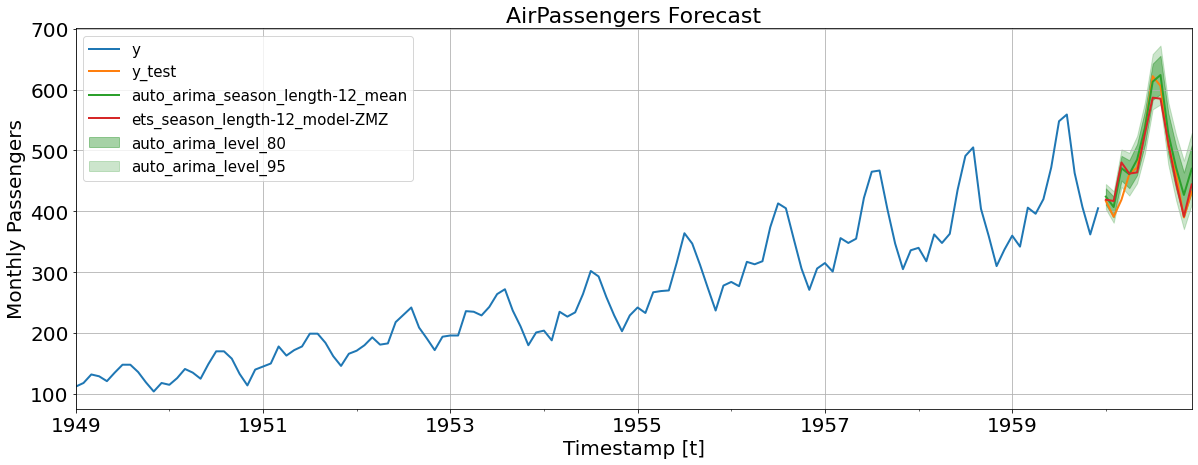

In [9]:
#We are going to plot the models againts the real values of test.

fig, ax = plt.subplots(1, 1, figsize = (20, 7))
df_plot = pd.concat([series_train, forecasts]).set_index('ds')
df_plot[['y', 'y_test', 'auto_arima_season_length-12_mean','ets_season_length-12_model-ZMZ']].plot(ax=ax, linewidth=2)
ax.fill_between(df_plot.index, 
                df_plot['auto_arima_season_length-12_lo-80'], 
                df_plot['auto_arima_season_length-12_hi-80'],
                alpha=.35,
                color='green',
                label='auto_arima_level_80')
ax.fill_between(df_plot.index, 
                df_plot['auto_arima_season_length-12_lo-95'], 
                df_plot['auto_arima_season_length-12_hi-95'],
                alpha=.2,
                color='green',
                label='auto_arima_level_95')
ax.set_title('AirPassengers Forecast', fontsize=22)
ax.set_ylabel('Monthly Passengers', fontsize=20)
ax.set_xlabel('Timestamp [t]', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(20)

# Adding external regressors
Some models like auto_arima, have the support for external regresors or exogenous variables. We are working to expand this feature to other models.

In [10]:
# First we are going to include new exogenous variables as columns to our train data_frame. (You can include things like weather or holidays)
series_train['trend'] = np.arange(1, ap_train.size + 1)
series_train['intercept'] = np.ones(ap_train.size)
series_train['month'] = series_train['ds'].dt.month
series_train = pd.get_dummies(series_train, columns=['month'], drop_first=True)

In [11]:
# We consruct the test DF. We use the index functionality to make it faster.
xreg_test = pd.DataFrame(
    {
        'ds': pd.date_range(start='1960-01-01', periods=ap_test.size, freq='M')
    },
    index=pd.Index([0] * ap_test.size, name='unique_id')
)

In [12]:
# We construct xreg for test. The train series ends at the 133th step. 
xreg_test['trend'] = np.arange(133, ap_test.size + 133)
xreg_test['intercept'] = np.ones(ap_test.size)
xreg_test['month'] = xreg_test['ds'].dt.month
xreg_test = pd.get_dummies(xreg_test, columns=['month'], drop_first=True)

In [13]:
#Define the parameters that you want to use in your models. 
season_length = 12

# Note: For all models the following parameters are passed automaticly and don't need to be declared: (X, h, future_xreg)

fcst = StatsForecast(
    series_train, 
    models=[(auto_arima, season_length), (ets, season_length, 'ZMZ')], 
    freq='M', 
    n_jobs=-1
)

forecasts = fcst.forecast(horizon, xreg=xreg_test)

In [14]:
forecasts['y_test'] = ap_test

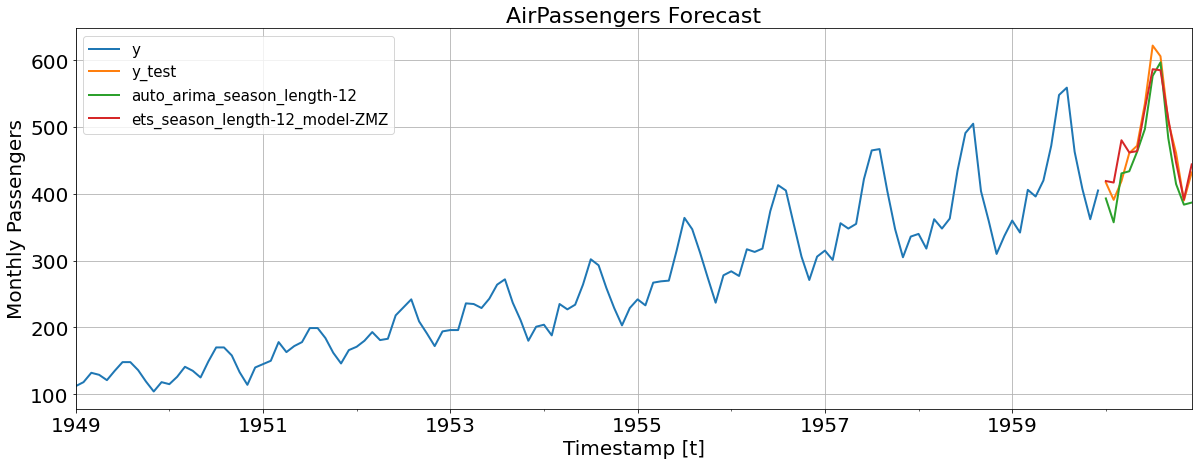

In [15]:
#We are going to plot the models againts the real values of test.

fig, ax = plt.subplots(1, 1, figsize = (20, 7))
df_plot = pd.concat([series_train, forecasts]).set_index('ds')
df_plot[['y', 'y_test', 'auto_arima_season_length-12','ets_season_length-12_model-ZMZ']].plot(ax=ax, linewidth=2)
ax.set_title('AirPassengers Forecast', fontsize=22)
ax.set_ylabel('Monthly Passengers', fontsize=20)
ax.set_xlabel('Timestamp [t]', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(20)